In [1]:

import _init_
from constants import *
from set_path import *
from config import *
from functions import *

In [14]:
folder = 'MetDepCooling/ZSol16pc/'
data_path = os.path.join(scratch, 'sims/', folder)
output_folder = os.path.join(fig_path, folder, 'TRhoHisto/')
os.chdir(output_folder)
list_file = glob.glob("histo_*.h5")
hf        = h5py.File(list_file[0] ,'r')
dens_bins = np.array(hf.get("DensBins"))
temp_bins = np.array(hf.get("TempBins"))
timestep_zsol = np.zeros(len(list_file))
mass_zsol = np.zeros((len(list_file), dens_bins.shape[0]-1, temp_bins.shape[0]-1))
mass_zsol_avg = np.zeros((dens_bins.shape[0]-1, temp_bins.shape[0]-1))
outmass_zsol = np.zeros((len(list_file), dens_bins.shape[0]-1, temp_bins.shape[0]-1))
outmass_zsol_avg = np.zeros((dens_bins.shape[0]-1, temp_bins.shape[0]-1))
num=0
for i in range(len(list_file)):
    hf = h5py.File(list_file[i] ,'r')
    timestep_zsol[i] = np.array(hf.get("Timestep")) 
    mass_zsol[i]     = np.array(hf.get("TotalMass"))
    outmass_zsol[i]  = np.array(hf.get("OutflowMass"))
    if(timestep_zsol[i]>100.):
        mass_zsol_avg+=mass_zsol[i] 
        outmass_zsol_avg+=outmass_zsol[i] 
        num+=1
    
mass_zsol_avg /= num
outmass_zsol_avg /= num

In [15]:
folder = 'Summit/2pc0.2ZSol/'
data_path = os.path.join(scratch, 'sims/', folder)
output_folder = os.path.join(fig_path, folder, 'TRhoHisto/')
os.chdir(output_folder)
list_file = glob.glob("histo_*.h5")
hf = h5py.File(list_file[0] ,'r')
dens_bins = np.array(hf.get("DensBins"))
temp_bins = np.array(hf.get("TempBins"))

timestep_02zsol = np.zeros(len(list_file))
mass_02zsol = np.zeros((len(list_file), dens_bins.shape[0]-1, temp_bins.shape[0]-1))
mass_02zsol_avg = np.zeros((dens_bins.shape[0]-1, temp_bins.shape[0]-1))
outmass_02zsol = np.zeros((len(list_file), dens_bins.shape[0]-1, temp_bins.shape[0]-1))
outmass_02zsol_avg = np.zeros((dens_bins.shape[0]-1, temp_bins.shape[0]-1))

num = 0.0
for i in range(len(list_file)):
    hf = h5py.File(list_file[i] ,'r')
    timestep_02zsol[i] = np.array(hf.get("Timestep")) 
    mass_02zsol[i]     = np.array(hf.get("TotalMass"))
    outmass_02zsol[i]  = np.array(hf.get("OutflowMass"))
    if(timestep_02zsol[i]>100.):
        mass_02zsol_avg+=mass_02zsol[i] 
        outmass_02zsol_avg+=outmass_02zsol[i] 
        num+=1
    
mass_02zsol_avg /= num
outmass_02zsol_avg /= num

In [4]:
time = 104
indx_Zsol = np.abs(timestep_zsol - time).argmin()
indx_ = np.abs(timestep_02zsol - time).argmin()
timestep_02zsol[indx_],timestep_zsol[indx_Zsol]

(103.54383687722, 103.45978811257457)

/jobfs/113219911.gadi-pbs/ipykernel_3802248/1630753488.py:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plot = ax[0].pcolormesh(dens_bins[:-1], temp_bins[:-1] , np.transpose(outmass_zsol_avg)/Msun,\
/jobfs/113219911.gadi-pbs/ipykernel_3802248/1630753488.py:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plot = ax[1].pcolormesh(dens_bins[:-1], temp_bins[:-1] , np.transpose(outmass_02zsol_avg)/Msun,\


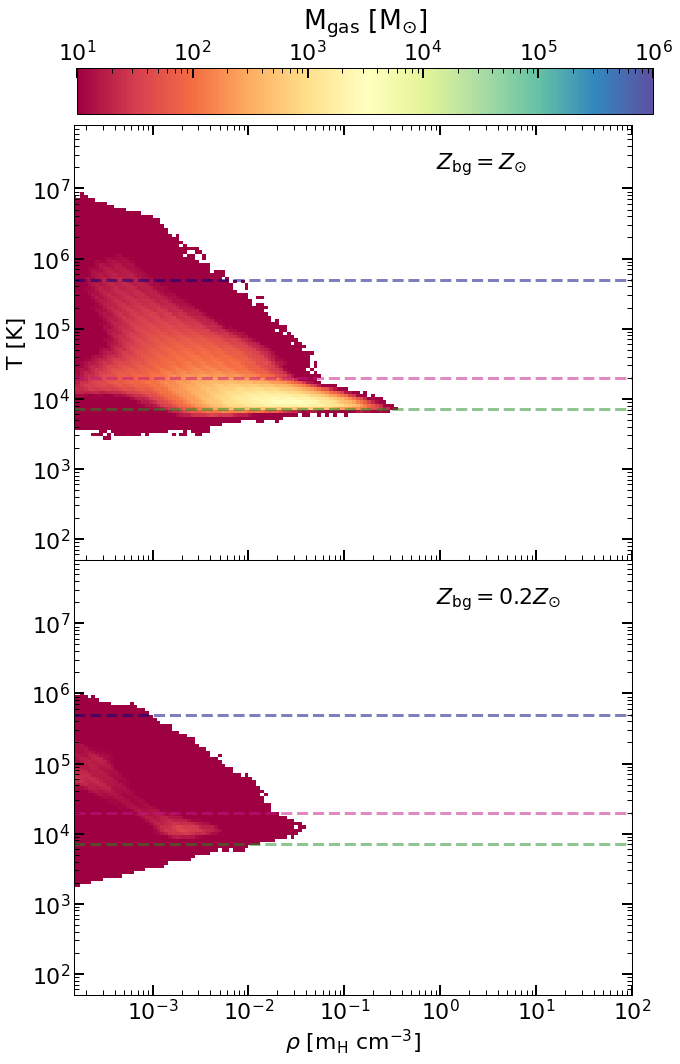

In [17]:
fig, ax = plt.subplots(2, 1, gridspec_kw = {'wspace':0.00, 'hspace':0.00},figsize=(10,16))

cbarx = 0.13
cbheight = 0.04
cbary = 0.89
cblen = 0.8
dx1 = 0.13
cbtitlex = 0.1
cbtitley = 16.5

plot = ax[0].pcolormesh(dens_bins[:-1], temp_bins[:-1] , np.transpose(outmass_zsol_avg)/Msun,\
                     norm=mcolors.LogNorm(vmin=10., vmax=1.e6),cmap='Spectral')
cax = fig.add_axes([cbarx, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(10., 1.e2, 1.e3, 1.e4, 1.e5, 1.e6))
cax.xaxis.set_ticks_position('top')
cax.set_title(r'M$_{\rm gas}$ [M$_{\odot}$]')


plot = ax[1].pcolormesh(dens_bins[:-1], temp_bins[:-1] , np.transpose(outmass_02zsol_avg)/Msun,\
                     norm=mcolors.LogNorm(vmin=10., vmax=1.e6),cmap='Spectral')


plt.setp(ax, 'yscale', ('log'))
plt.setp(ax, 'xscale', ('log'))
plt.setp(ax, 'xlim',(1.e-4, 1.e2))
plt.setp(ax, 'xlim',(1.5e-4, 1.e2))
plt.setp(ax, 'ylim',(5.e1, 8.e7))

ax[0].set_ylabel(r'T [K]')
plt.setp(ax, 'xlabel', (r'$\rho$ [m$_{\rm H}$ cm$^{-3}$]'))

ax[0].tick_params(axis='y', which='both', left=True, right=True)
ax[0].tick_params(axis='x', which='both', bottom=True, top=True, labelbottom=False)

ax[0].text(0.65, 0.9, r'$Z_{\rm bg}=Z_{\odot}$', transform=ax[0].transAxes)
ax[1].text(0.65, 0.9, r'$Z_{\rm bg}=0.2 Z_{\odot}$', transform=ax[1].transAxes)
# ax[0].text(0.7, 0.7, '%.1f'%(timestep_zsol[indx_Zsol]) + ' Myr', transform=ax[0].transAxes)
# ax[1].text(0.7, 0.7, '%.1f'%(timestep_02zsol[indx_]) + ' Myr', transform=ax[1].transAxes)

ls = ['--', '-.', (0, (3, 1, 1, 1)), (0, (3, 1, 1, 1, 1, 1)) ]
color = ['forestgreen', 'mediumvioletred', 'navy',  'indianred', ]
tvals = [ 7105, 2.e4, 5.e5]
kk=0
for i in range(2):
    kk=0
    for tt in tvals:
        ax[i].axhline(tt, ls='--', color=color[kk], lw=3.0, alpha=0.5)
        kk+=1


# ax[-1].tick_params(axis='y', which='both', left=True, right=True,labelleft=False, labelright=True)
ax[-1].tick_params(axis='y', which='both', left=True, right=True)
# plt.savefig(fig_home + 'temp-dens-mgas.jpeg', bbox_inches='tight', dpi=160)

In [19]:
np.sum(mass_zsol_avg)/np.sum(mass_02zsol_avg)

0.9538074521743349

/jobfs/113219911.gadi-pbs/ipykernel_3802248/2161976451.py:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plot = ax[0].pcolormesh(dens_bins[:-1], temp_bins[:-1] , np.transpose(mass_zsol_avg)/Msun,\
/jobfs/113219911.gadi-pbs/ipykernel_3802248/2161976451.py:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plot = ax[1].pcolormesh(dens_bins[:-1], temp_bins[:-1] , np.transpose(mass_02zsol_avg)/Msun,\


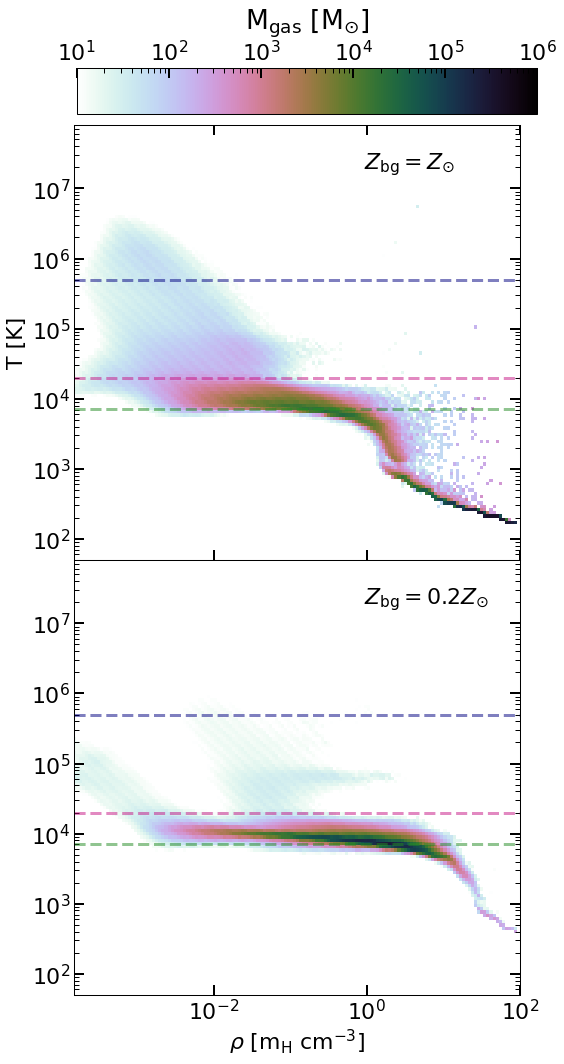

In [20]:
fig, ax = plt.subplots(2, 1, gridspec_kw = {'wspace':0.00, 'hspace':0.00},figsize=(8,16))

cbarx = 0.13
cbheight = 0.04
cbary = 0.89
cblen = 0.8
dx1 = 0.13
cbtitlex = 0.1
cbtitley = 16.5

plot = ax[0].pcolormesh(dens_bins[:-1], temp_bins[:-1] , np.transpose(mass_zsol_avg)/Msun,\
                     norm=mcolors.LogNorm(vmin=10., vmax=1.e6),cmap='cubehelix_r')
cax = fig.add_axes([cbarx, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(10., 1.e2, 1.e3, 1.e4, 1.e5, 1.e6))
cax.xaxis.set_ticks_position('top')
cax.set_title(r'M$_{\rm gas}$ [M$_{\odot}$]')


plot = ax[1].pcolormesh(dens_bins[:-1], temp_bins[:-1] , np.transpose(mass_02zsol_avg)/Msun,\
                     norm=mcolors.LogNorm(vmin=10., vmax=1.e6),cmap='cubehelix_r')


plt.setp(ax, 'yscale', ('log'))
plt.setp(ax, 'xscale', ('log'))
plt.setp(ax, 'xlim',(1.e-4, 1.e2))
plt.setp(ax, 'xlim',(1.5e-4, 1.e2))
plt.setp(ax, 'ylim',(5.e1, 8.e7))

ax[0].set_ylabel(r'T [K]')
plt.setp(ax, 'xlabel', (r'$\rho$ [m$_{\rm H}$ cm$^{-3}$]'))

ax[0].tick_params(axis='y', which='both', left=True, right=True)
ax[0].tick_params(axis='x', which='both', bottom=True, top=True, labelbottom=False)

ax[0].text(0.65, 0.9, r'$Z_{\rm bg}=Z_{\odot}$', transform=ax[0].transAxes)
ax[1].text(0.65, 0.9, r'$Z_{\rm bg}=0.2 Z_{\odot}$', transform=ax[1].transAxes)
# ax[0].text(0.7, 0.7, '%.1f'%(timestep_zsol[indx_Zsol]) + ' Myr', transform=ax[0].transAxes)
# ax[1].text(0.7, 0.7, '%.1f'%(timestep_02zsol[indx_]) + ' Myr', transform=ax[1].transAxes)

ls = ['--', '-.', (0, (3, 1, 1, 1)), (0, (3, 1, 1, 1, 1, 1)) ]
color = ['forestgreen', 'mediumvioletred', 'navy',  'indianred', ]
tvals = [ 7105, 2.e4, 5.e5]
kk=0
for i in range(2):
    kk=0
    for tt in tvals:
        ax[i].axhline(tt, ls='--', color=color[kk], lw=3.0, alpha=0.5)
        kk+=1


# ax[-1].tick_params(axis='y', which='both', left=True, right=True,labelleft=False, labelright=True)
ax[-1].tick_params(axis='y', which='both', left=True, right=True)
# plt.savefig(fig_home + 'temp-dens-mgas.jpeg', bbox_inches='tight', dpi=160)

Outflow Zsol mass= 406115.974732003
Outflow 0.2Zsol mass= 13033.389355139765
Total Zsol mass= 9524546.707961565
Total Zsol mass= 9985817.03911943


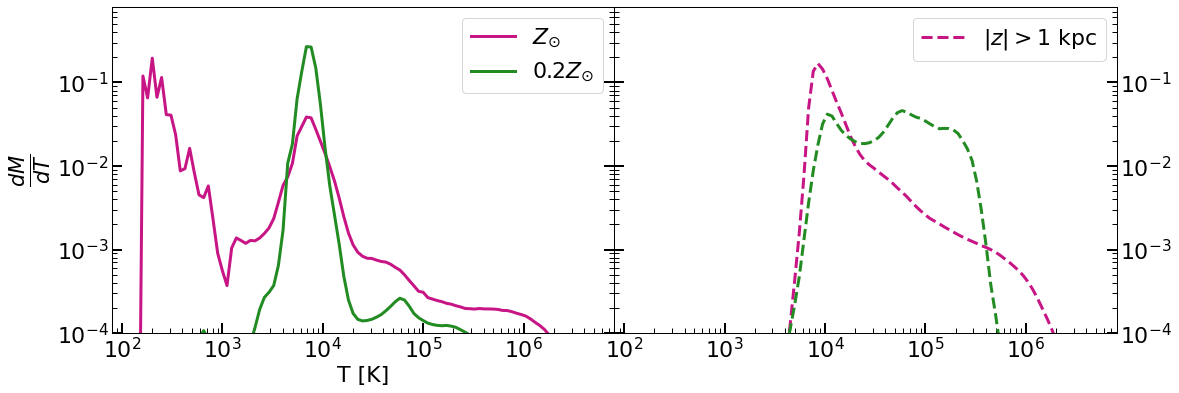

In [24]:
fig, ax = plt.subplots(1, 2, gridspec_kw = {'wspace':0.00, 'hspace':0.00},figsize=(18,6))

cbarx = 0.13
cbheight = 0.04
cbary = 0.89
cblen = 0.8
dx1 = 0.13
cbtitlex = 0.1
cbtitley = 16.5

dM_dT = np.sum(outmass_zsol_avg, axis=0)
totmass = np.sum(outmass_zsol_avg)
print("Outflow Zsol mass=", totmass/Msun)
ax[1].plot(temp_bins[:-1], dM_dT/totmass, ls= '--', color='mediumvioletred', label=r'$|z|>1$ kpc', lw=3.)

dM_dT = np.sum(outmass_02zsol_avg, axis=0)
totmass = np.sum(outmass_02zsol_avg)
print("Outflow 0.2Zsol mass=", totmass/Msun)
ax[1].plot(temp_bins[:-1], dM_dT/totmass,ls= '--',color='forestgreen', lw=3.)

dM_dT = np.sum(mass_zsol_avg, axis=0)
totmass = np.sum(mass_zsol_avg)
print("Total Zsol mass=", totmass/Msun)
ax[0].plot(temp_bins[:-1], dM_dT/totmass, color='mediumvioletred',label=r'$Z_{\odot}$', lw=3.)

dM_dT = np.sum(mass_02zsol_avg, axis=0)
totmass = np.sum(mass_02zsol_avg)
print("Total Zsol mass=", totmass/Msun)
ax[0].plot(temp_bins[:-1], dM_dT/totmass, color='forestgreen',label=r'$0.2Z_{\odot}$', lw=3.)


# ax.plot(temp_bins[:-1], dM_dT_ini/np.sum(dM_dT_ini), label=r't=0')



plt.setp(ax, 'xscale',('log'))
plt.setp(ax, 'yscale',('log'))
ax[0].set_ylabel(r'$\frac{dM}{dT}$', fontsize=30)
ax[0].tick_params('y', which='both', right=True)
ax[1].tick_params('y', which='both', right=True, left=True, labelleft=False, labelright=True)
ax[0].set_xlabel('T [K]')
plt.setp(ax,'ylim',(1.e-4, 0.8))
plt.setp(ax, 'xlim',(8.e1, 8.e6))
ax[0].legend()
ax[1].legend()